In [1]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/CAX_Train1/'

In [ ]:
PH_data_one = pd.DataFrame()

In [ ]:

files = [f for f in listdir(file_path) if isfile(join(file_path, f))]
for idy, file_iter in enumerate(files):
    print ("File no " + str(idy) + " of "+ str(len(files)))
    data = pd.read_csv('/content/drive/MyDrive/CAX_Train1/'+ file_iter)
    PH_one = data['PH'] == 1
    PH_data_one = PH_data_one.append(data[PH_one])

File no 0 of 200
File no 1 of 200
File no 2 of 200
File no 3 of 200
File no 4 of 200
File no 5 of 200
File no 6 of 200
File no 7 of 200
File no 8 of 200
File no 9 of 200
File no 10 of 200
File no 11 of 200
File no 12 of 200
File no 13 of 200
File no 14 of 200
File no 15 of 200
File no 16 of 200
File no 17 of 200
File no 18 of 200
File no 19 of 200
File no 20 of 200
File no 21 of 200
File no 22 of 200
File no 23 of 200
File no 24 of 200
File no 25 of 200
File no 26 of 200
File no 27 of 200
File no 28 of 200
File no 29 of 200
File no 30 of 200
File no 31 of 200
File no 32 of 200
File no 33 of 200
File no 34 of 200
File no 35 of 200
File no 36 of 200
File no 37 of 200
File no 38 of 200
File no 39 of 200
File no 40 of 200
File no 41 of 200
File no 42 of 200
File no 43 of 200
File no 44 of 200
File no 45 of 200
File no 46 of 200
File no 47 of 200
File no 48 of 200
File no 49 of 200
File no 50 of 200
File no 51 of 200
File no 52 of 200
File no 53 of 200
File no 54 of 200
File no 55 of 200
Fi

In [ ]:
PH_data_one.to_pickle('PH_data_one.df')

In [ ]:

import pandas as pd
import numpy as np

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler

import pickle
import itertools

In [ ]:
pickle_file = open("PH_data_one.df", "rb")

In [ ]:
training_data = pd.read_pickle('PH_data_one.df')

In [ ]:
training_data

,ACID,Flight_instance_ID,Year,Month,Day,Hour,Minute,Second,ABRK,ELEV_1,...,BPGR_2,BPYR_1,BPYR_2,CALT,CASS,CRSS,DFGS,DWPT,EAI,FF
0,676,676200405111519,2004,5,11,15,18,18,119.983559,20.517357,...,34.179775,1914.067383,0.0,0,132.0,35.947010,1,131476,0,0
1,676,676200405111519,2004,5,11,15,18,19,119.983559,20.517357,...,34.179775,1899.418945,0.0,0,132.0,35.947010,1,131476,0,0
2,676,676200405111519,2004,5,11,15,18,20,119.983559,20.517357,...,34.179775,473.634003,0.0,0,132.0,35.947010,1,131472,0,0
3,676,676200405111519,2004,5,11,15,18,21,119.983559,20.517357,...,34.179775,53.711075,0.0,0,132.0,35.947010,1,131476,0,0
4,676,676200405111519,2004,5,11,15,18,22,119.983559,20.517357,...,29.296949,53.711075,0.0,0,132.0,35.947010,1,131476,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,676,676201003140736,2002,3,14,8,44,17,119.924973,21.376591,...,29.296949,2734.381836,0.0,0,120.0,61.962448,1,32,0,0
4128,676,676201003140736,2002,3,14,8,44,18,119.910324,21.376591,...,29.296949,2734.381836,0.0,0,120.0,61.962448,1,32,0,0
4129,676,676201003140736,2002,3,14,8,44,19,119.924973,21.356133,...,29.296949,2734.381836,0.0,0,120.0,61.962448,1,32,0,0
4130,676,676201003140736,2002,3,14,8,44,20,119.924973,21.335674,...,29.296949,2734.381836,0.0,0,120.0,61.962448,1,32,0,0


In [ ]:
feature_columns = [col for col in training_data.columns if not (col=='FF' or col=='Flight_instance_ID' or  col=='ACID')]

y = training_data['FF'].values
X = training_data[feature_columns].values


In [ ]:
X = StandardScaler().fit(X).transform(X)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
X = VarianceThreshold(threshold=0.0).fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_one_rf_gen_one.model", "wb" )) 


In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])


['N1CO' 'HYDY' 'HYDG' 'EVNT' 'FADF' 'CWPC_Min' 'PH' 'N1T_Mean' 'ILSF'
 'GPWS' 'CWPF_Mean' 'OIT_4' 'Year' 'FQTY_2' 'GS_Max' 'PTRM' 'AOAI_Min'
 'CWPC_Max' 'N1T_Min' 'CAS_Mean' 'BAL1_Max' 'ALTR_Max' 'FQTY_4' 'AOAI_Max'
 'LATG_Mean' 'FQTY_1' 'AOA1_Mean' 'Month' 'BAL2_Max' 'LONG_Mean' 'VHF1'
 'FQTY_3' 'MH_Max' 'APUF_Max' 'LATG_Max' 'WAI_1' 'RUDD_Max' 'BAL1_Mean'
 'FIRE_1' 'PSA_Max' 'PUSH' 'WAI_2' 'MSQT_1_Max' 'PACK' 'BAL2_Min'
 'MACH_Min' 'ALTR_Min' 'BAL1_Min' 'POVT' 'RUDD_Mean' 'SHKR_Min' 'VSPS'
 'PSA_Mean' 'MSQT_2_Max' 'BAL2_Mean' 'GS_Min' 'N1T_Max' 'CCPC_Mean' 'VHF3'
 'DA_Max' 'FIRE_3' 'APUF_Mean' 'RUDP_Mean' 'ALT_Max' 'HF1' 'AOA2_Mean'
 'SAT' 'CWPF_Min' 'PT_Max' 'TMODE' 'PT_Min' 'ABRK' 'MH_Min' 'GLS'
 'PI_Mean' 'AOA1_Max' 'SHKR_Max' 'Minute' 'AOA2_Min' 'VMODE' 'PS_Max'
 'AOAI_Mean' 'FADS' 'PSA_Min' 'NSQT_Max' 'FIRE_4' 'SMKB' 'ALT_Min'
 'PT_Mean' 'CWPF_Max' 'CCPC_Min' 'ELEV_2' 'TAI' 'APUF_Min' 'SPL_2'
 'MSQT_1_Mean' 'RUDD_Min' 'PS_Min' 'TOCW_Min' 'PI_Min' 'CCPF_Mean' 'SMOK'
 'FIRE_2' 'AO

In [ ]:
print(np.argsort(rfr.feature_importances_))

[ 37  28  27   9  10  78  44 161  29  23  80  42   0  19 148  46 129  79
 162 137 133 118  21 130 149  18 119   1 136 152  61  20 160  70 151  66
 103 131  13  97  47  67  85  43 135 156 117 132  45 101 108  65  95  88
 134 147 163  71  63 145  15  68 104 115  25 122  48  81 100  60  99   6
 159  22  89 121 109   4 123  64  94 128  11  96 166  16  49 114  98  82
  72   8  56  69  55  83 102  93 111  90  74  50  14 120 124  92   3 150
  87 116 125  41  77 155 157 165  51  54  84 140  38  86 106  17  30  62
  40  91  32 105 138  73  75 158 112 107 164  76 142  52  36 154  53 143
 113   2 139 110  24 146 141 144  26  59   5  58  39  57 127 153 126   7
  12  33  31  35 167 168  34]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 55.182466608197366


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.6907027286175296


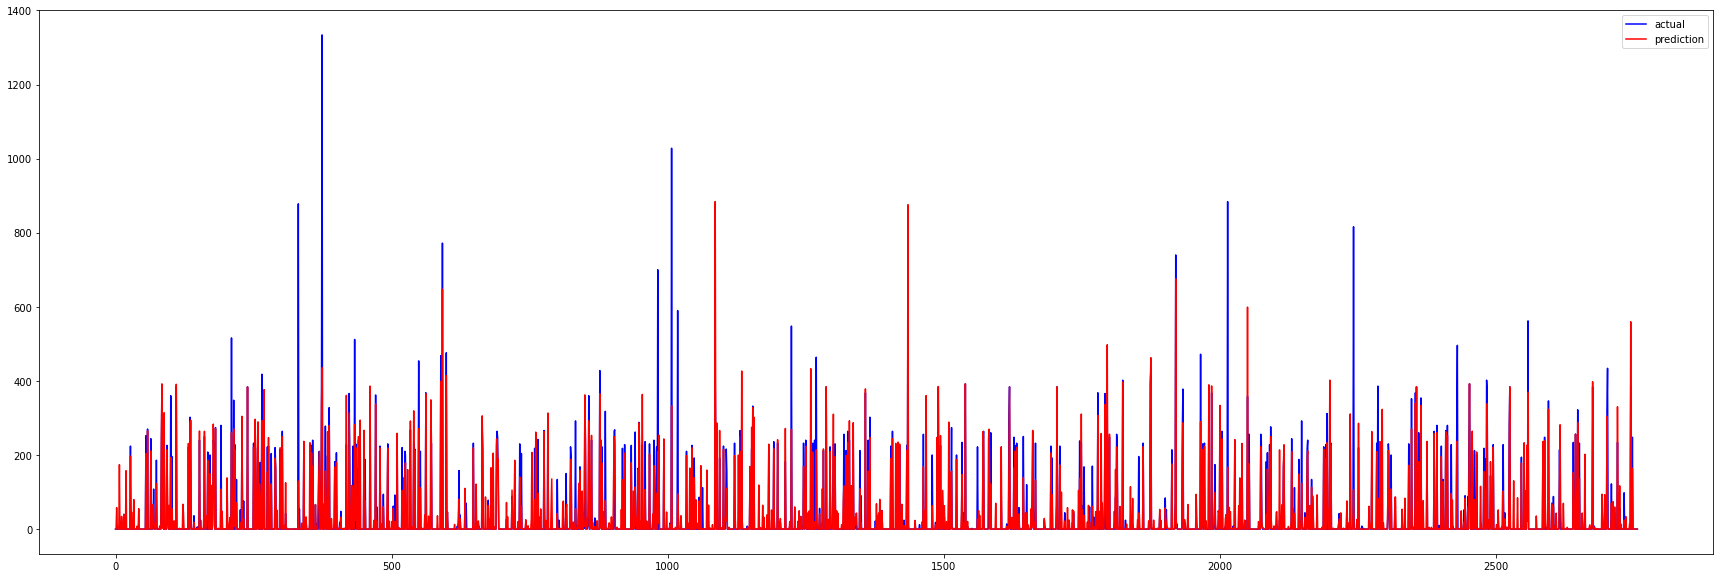

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()





**GRADIENT BOOSTING REGRESSOR**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
rfr = GradientBoostingRegressor(n_estimators=10, random_state= 0 )

In [ ]:
rfr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [ ]:
pickle.dump( rfr, open( "ph_one_rf_gen_one.model", "wb" )) 


In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
feat_column = np.array(feature_columns)
sort_index = np.array(np.argsort(rfr.feature_importances_))

In [ ]:
print(feat_column[sort_index])

['Year' 'PS_Mean' 'PS_Min' 'GS_Max' 'PSA_Mean' 'PSA_Min' 'PSA_Max'
 'PI_Max' 'PT_Mean' 'PT_Max' 'RUDD_Mean' 'RUDD_Min' 'RUDD_Max' 'RUDP_Mean'
 'RUDP_Min' 'PT_Min' 'RUDP_Max' 'LATG_Mean' 'MSQT_2_Max' 'CCPC_Max'
 'CCPF_Mean' 'LONG_Min' 'LONG_Mean' 'LATG_Max' 'CWPC_Min' 'PI_Mean'
 'CWPC_Max' 'CWPF_Min' 'CWPF_Max' 'MSQT_1_Mean' 'MSQT_1_Max' 'MSQT_2_Mean'
 'MSQT_2_Min' 'CWPF_Mean' 'CCPC_Min' 'SHKR_Mean' 'SHKR_Max' 'DA_Min'
 'AOAI_Min' 'AOAI_Max' 'BAL1_Mean' 'BAL1_Min' 'BAL1_Max' 'DA_Max'
 'BAL2_Mean' 'BAL2_Max' 'CAS_Mean' 'CAS_Min' 'CAS_Max' 'CASM_Mean'
 'CASM_Min' 'BAL2_Min' 'GS_Min' 'AOAC_Min' 'AOA2_Max' 'TOCW_Mean'
 'TOCW_Min' 'TOCW_Max' 'ALT_Mean' 'ALT_Min' 'ALT_Max' 'GS_Mean'
 'ALTR_Mean' 'ALTR_Max' 'AOA1_Mean' 'AOA1_Min' 'AOA1_Max' 'AOA2_Mean'
 'AOA2_Min' 'ALTR_Min' 'CASM_Max' 'CCPC_Mean' 'APUF_Min' 'FQTY_2' 'FQTY_3'
 'FQTY_4' 'GLS' 'N1T_Min' 'HDGS' 'FQTY_1' 'HF1' 'HYDG' 'HYDY' 'ILSF'
 'N1T_Mean' 'LMOD' 'MH_Max' 'HF2' 'LONP' 'FLAP' 'FIRE_3' 'Month' 'Day'
 'Hour' 'Minute' 'Second' 'ABR

In [ ]:
print(np.argsort(rfr.feature_importances_))

[  0  92  93 148  95  96  97  91  98 100 101 102 103 104 105  99 106 149
  88  73  74 153 152 151  78  89  79  81  82  83  85  86  87  80  72 107
 109 144 129 130 131 132 133 145 134 136 137 138 139 140 141 135 147 126
 124 110 111 112 113 114 115 146 116 118 119 120 121 122 123 117 142  71
  69  19  20  21  22 162  24  18  25  27  28  29 161  31 160  26  33  17
  15   1   2   3   4   5   6  16 166   9  10 163  12  13  14 165 159 158
  36  68  67  66  63  62  61  60  59  58  57  56 154 155  70  52  53  50
  37  39  40 157  51  43  42  45  46  47  48  49  44 143 150  38  64  65
  84  54   8  23 108   7  41  55 125  75  77 127  76  11  32 156  94  30
 128  90 164  35 167  34 168]


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 83.57140185310142


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.29060316781462325


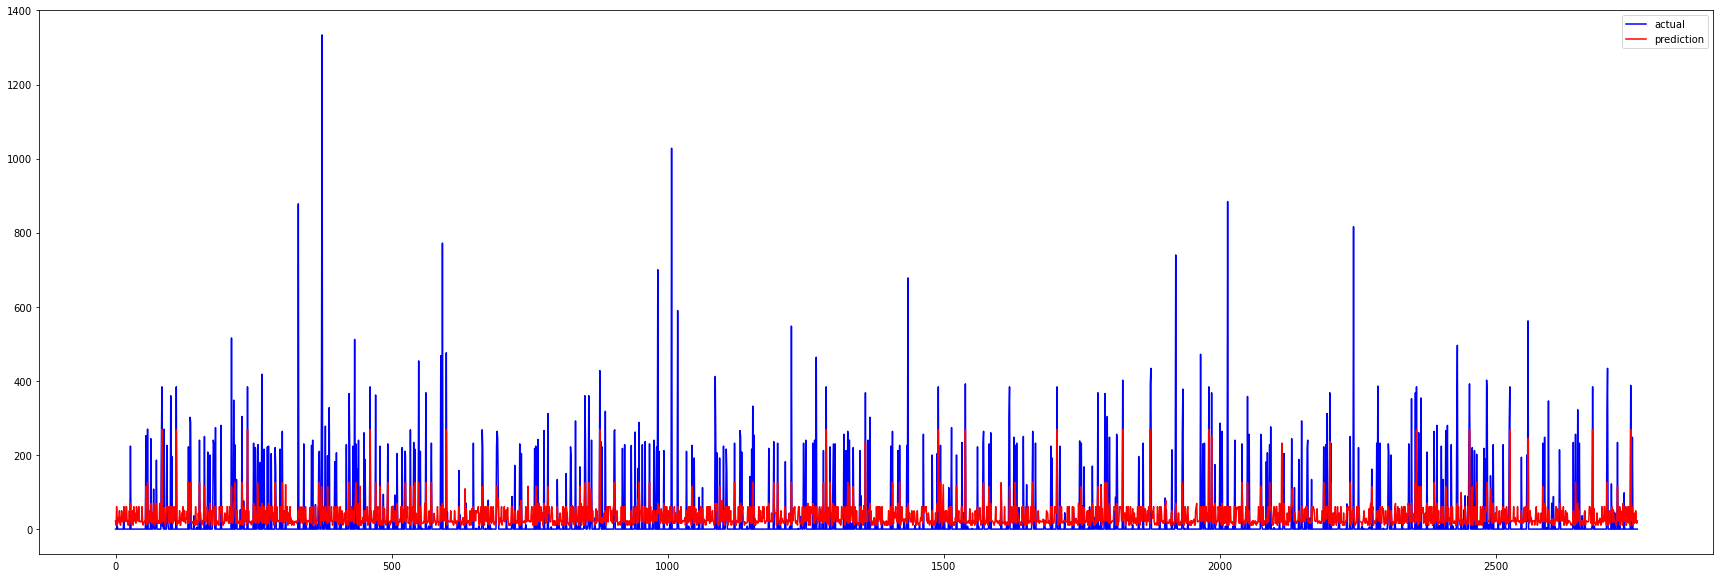

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**K NEAREST NEIGHBOURS**

In [ ]:
from sklearn import neighbors

In [ ]:
rfr = neighbors.KNeighborsRegressor(n_neighbors =20 )

In [ ]:
rfr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_one_rf_gen_one.model", "wb" )) 


In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 86.2120597033994


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.2450643882388822


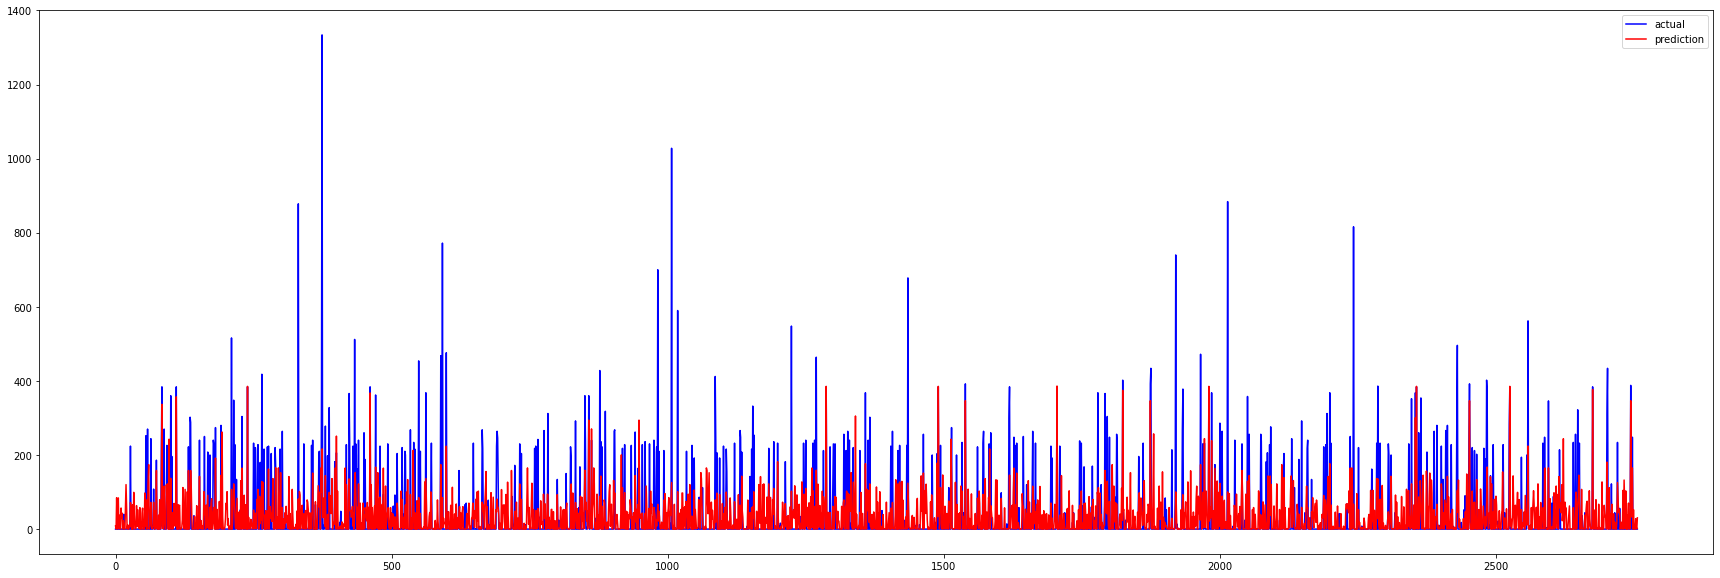

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**LINEAR REGRESSION**

In [ ]:
from sklearn import linear_model


In [ ]:
rfr=linear_model.LinearRegression()

In [ ]:
rfr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = rfr.predict(X_val)

In [ ]:
pickle.dump( rfr, open( "ph_one_rf_gen_one.model", "wb" )) 

In [ ]:
print("RMSE", sqrt(mean_squared_error(y_val, y_pred)))

RMSE 94.60162006144303


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
R2_score = r2_score(y_val, y_pred)
print("R2_Score:",R2_score)

R2_Score: 0.28634977017201413


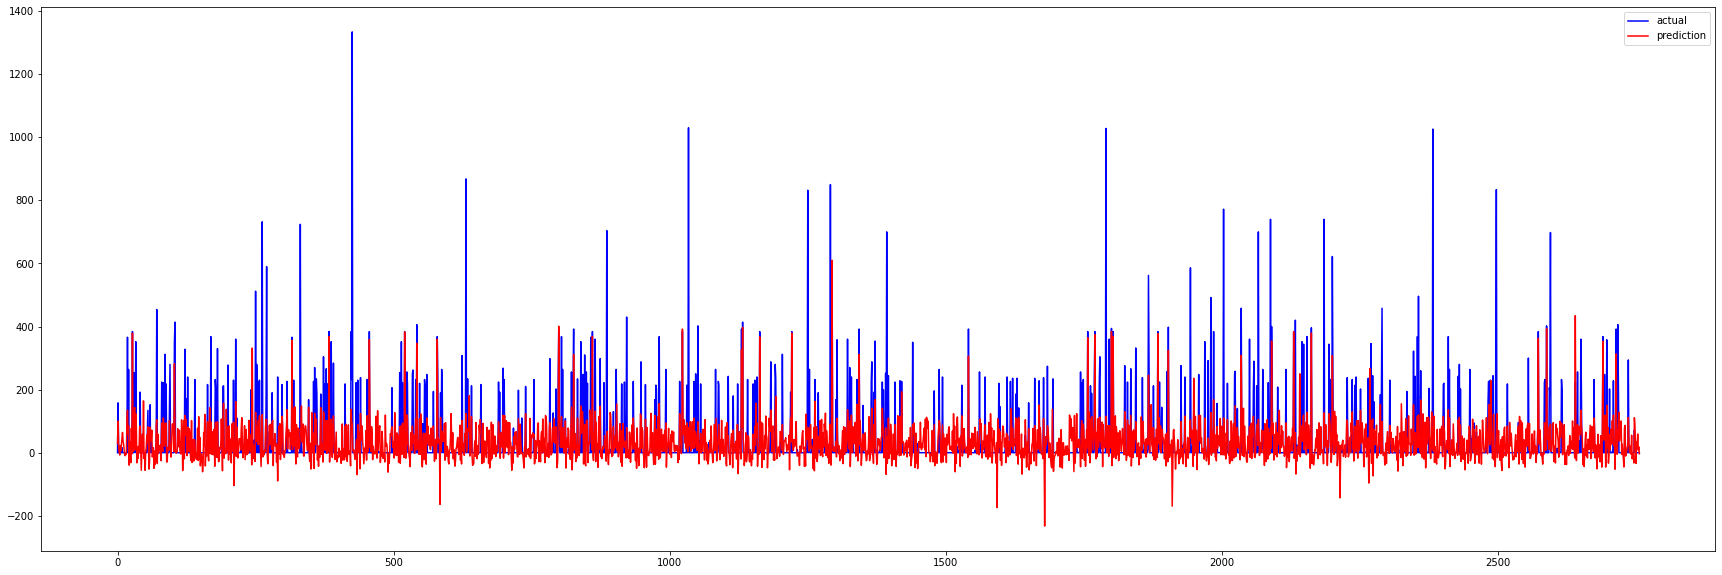

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

##**ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu',input_shape=(169,)))
                                                                                         
                                                                                         
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))
regressor.add(Dense(40, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
regressor.add(Dense( 1, kernel_initializer = 'glorot_uniform', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = RMSprop(0.001), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])


In [ ]:
regressor.fit(X_train,y_train,epochs=25)

Epoch 1/25
201/201 [==============================] - 2s 5ms/step - loss: 35.8455 - mean_absolute_error: 35.8455
Epoch 2/25
201/201 [==============================] - 1s 7ms/step - loss: 35.5160 - mean_absolute_error: 35.5160
Epoch 3/25
201/201 [==============================] - 1s 7ms/step - loss: 32.2949 - mean_absolute_error: 32.2949
Epoch 4/25
201/201 [==============================] - 1s 7ms/step - loss: 30.3017 - mean_absolute_error: 30.3017
Epoch 5/25
201/201 [==============================] - 1s 4ms/step - loss: 28.6849 - mean_absolute_error: 28.6849
Epoch 6/25
201/201 [==============================] - 1s 4ms/step - loss: 27.2272 - mean_absolute_error: 27.2272
Epoch 7/25
201/201 [==============================] - 1s 4ms/step - loss: 25.9276 - mean_absolute_error: 25.9276
Epoch 8/25
201/201 [==============================] - 1s 4ms/step - loss: 24.7702 - mean_absolute_error: 24.7702
Epoch 9/25
201/201 [==============================] - 1s 4ms/step - loss: 23.6846 - mean_absolut

In [ ]:
y_pred= regressor.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.4590094268902061
MSE: 6784.243622960452
RMSE: 82.3665200367264
MAE: 21.485431276306734


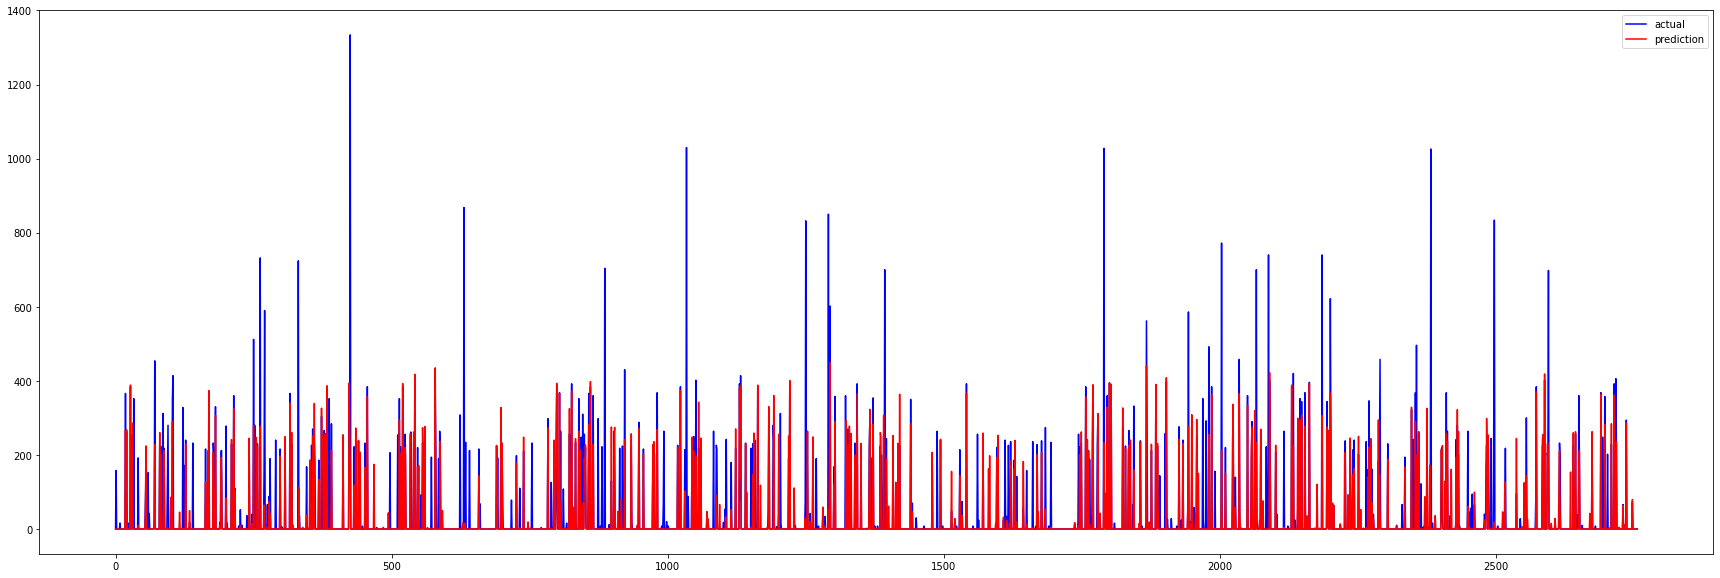

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(30,10))
plt.plot(y_val,c='blue',label='actual')
plt.plot(y_pred,c='red',label='prediction')
plt.legend()
plt.show()

**CNN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(169,1)))
model.add(Flatten())


In [ ]:
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 168, 32)           96        
                                                                 
 flatten_3 (Flatten)         (None, 5376)              0         
                                                                 
 dense_29 (Dense)            (None, 64)                344128    
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 344,289
Trainable params: 344,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=12,epochs=50, verbose=0)


In [ ]:
y_pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
R2_score = r2_score(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
from math import sqrt
RMSE=sqrt(mean_squared_error(y_val,y_pred))
MAE = mae(y_val,y_pred)
print("R2_Score:",R2_score)
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

R2_Score: 0.6250283047842904
MSE: 4702.29881721352
RMSE: 68.57330980209079
MAE: 26.338863054943726


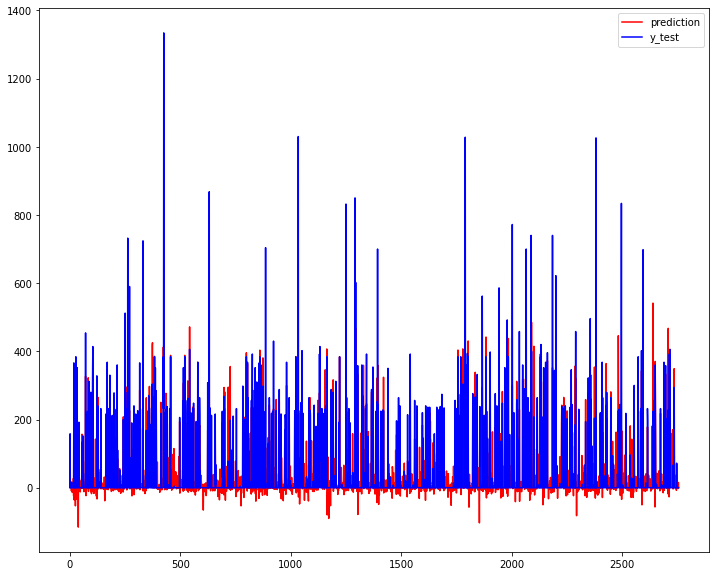

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.plot(y_pred,c='red',label='prediction')
plt.plot(y_val,c='blue',label='y_test')
plt.legend()
plt.show()